# Stochastics
### RANDOM NUMBERS
### SIMULATION
### VALUATION
### RISK MEASURES

In [2]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
npr.seed(100)
np.set_printoptions(precision=4)

In [3]:
npr.rand(10) # 10 random numbers in [0, 1]

array([0.47434496, 0.3134296 , 0.10966349, 0.84392077, 0.75371061,
       0.57701843, 0.02850383, 0.84737857, 0.41555111, 0.22011174])

In [25]:
npr.rand(5, 5) # 25 random numbers in shape [5, 5]

array([[0.12645191, 0.13422808, 0.66422983, 0.49920453, 0.10542776],
       [0.69305998, 0.40066886, 0.37519258, 0.385123  , 0.21546865],
       [0.21489664, 0.51306467, 0.44355708, 0.97273313, 0.73831912],
       [0.41766282, 0.11920729, 0.63243072, 0.11320172, 0.92212158],
       [0.82399582, 0.94496363, 0.82385896, 0.75982975, 0.13679139]])

In [23]:
''' 
Seeding random numbers in a range with broadcasting
'''
a = 5.
b = 10.
npr.rand(10) * (b - a) + a
npr.rand(5, 5) * (b - a) + a # Also works in 2 dimension case

array([[6.73001296, 8.07250665, 6.45421999, 9.34122574, 8.05780252],
       [9.52028416, 9.43481703, 5.51396526, 6.03055478, 9.84501285],
       [9.48438666, 8.27978754, 9.3107288 , 7.4394957 , 6.6754228 ],
       [7.32194305, 9.21722307, 5.84724608, 9.2662523 , 7.35460243],
       [5.08111943, 9.2501175 , 7.17314441, 9.93321976, 9.13774317]])

# Random API
* `rand(n, m, q…)` random numbers in ${[0, 1}$ in specified shape of `**args`
* `randn(n, m, q...)` as above but drawn from standard normal distrbution in ${[0, 1]}$
* `randint(low, high, size)` random integer from low inclusive to high exclusive
* `choice(a, size, replace, p)` is `size` draws from array `a` with or without replacement (`replace`). `p` is an optional array of length `a` giving probabilities to the choices - otherwise a uniform distribution is assumed

(array([ 2.,  1.,  1.,  4.,  2.,  5.,  4.,  6.,  3.,  5.,  8.,  7.,  8.,
         6.,  1.,  4.,  7., 10.,  5.,  2.,  3.,  1.,  1.,  1.,  3.]),
 array([-2.15624329, -1.98432345, -1.81240362, -1.64048379, -1.46856396,
        -1.29664412, -1.12472429, -0.95280446, -0.78088463, -0.6089648 ,
        -0.43704496, -0.26512513, -0.0932053 ,  0.07871453,  0.25063437,
         0.4225542 ,  0.59447403,  0.76639386,  0.93831369,  1.11023353,
         1.28215336,  1.45407319,  1.62599302,  1.79791286,  1.96983269,
         2.14175252]),
 <a list of 25 Patch objects>)

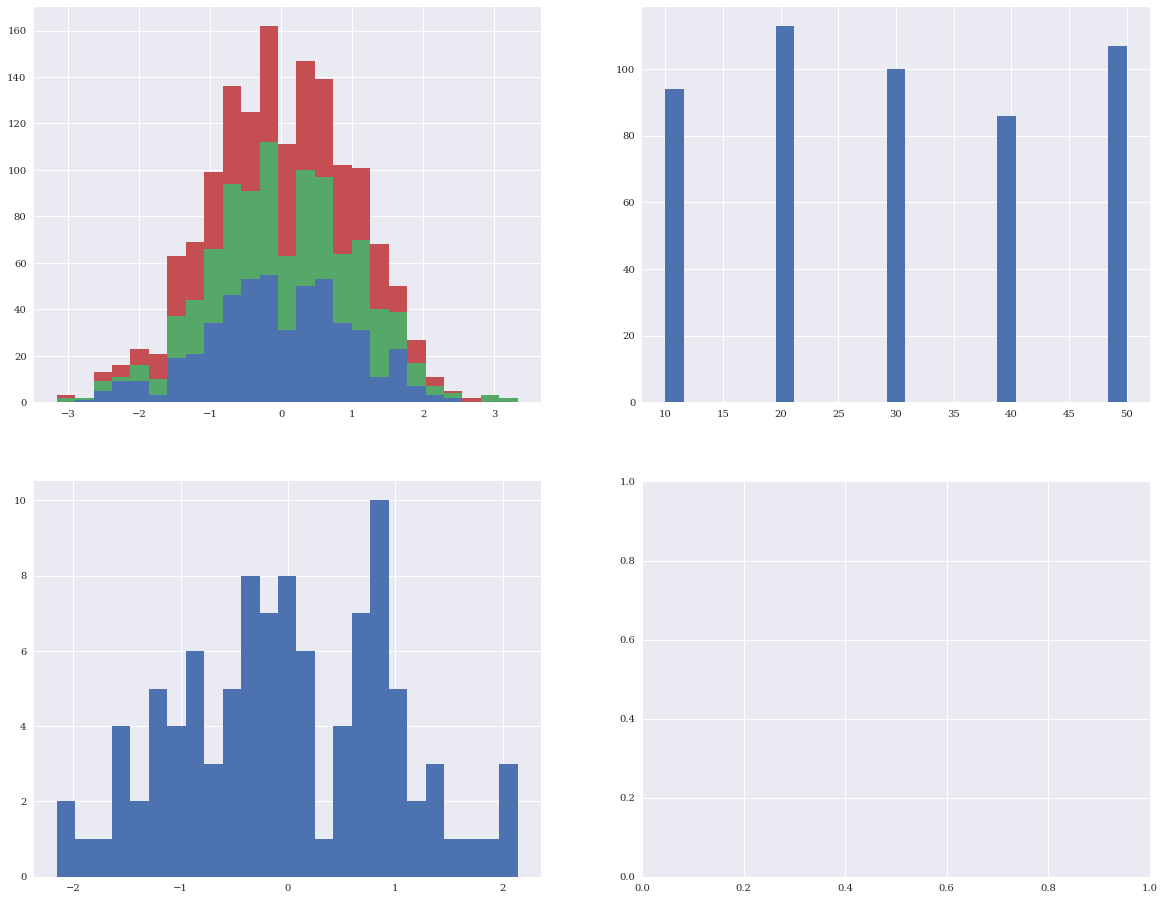

In [64]:
sample_size = 500
rn1 = npr.randn(sample_size, 3) # i.e. 500 rows, 3 columns
a = [ 10, 20, 30, 40, 50]
a_no_replace = npr.randn(sample_size)
rn2 = npr.choice(a, size=sample_size)
''' Kind of a dumb example, but the below is creating a population and sampling from it without replacement'''
rn3 = npr.choice(a_no_replace, size=100, replace=False)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                                     figsize=(20, 16))

ax1.hist(rn1, bins=25, stacked=True)
ax2.hist(rn2, bins=25)
ax3.hist(rn3, bins=25)

# Distributions Used in Finance
* The most commonly used distributions in finace are the normal and log-normal
* This is because they can easily be discretized and even most models that don't rest on these distributions can be easily discretized using them

(array([ 24.,  39.,  74., 185.,  64.,  45.,  50.,   9.,   6.,   4.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

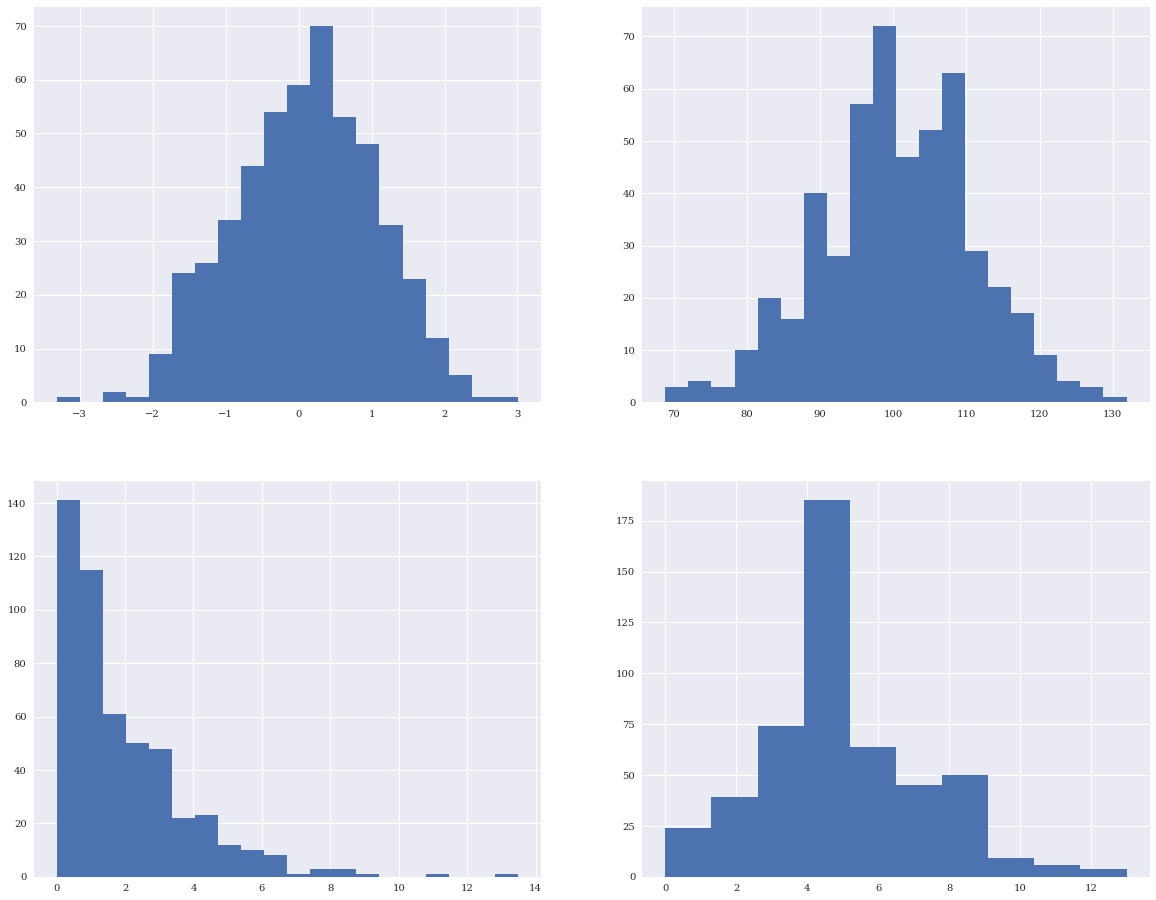

In [88]:
sample_size = 500
rn1 = npr.standard_normal(sample_size) # mean 0, standard deviation 1
rn2 = npr.normal(100, 10, sample_size) # mean 100, standard deviation 10
rn3 = npr.chisquare(df=2, size=sample_size)
rn4 = npr.poisson(lam=5.0, size=sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
ax1.hist(rn1, bins=20)
ax2.hist(rn2, bins=20)
ax3.hist(rn3, bins=20)
ax4.hist(rn4)

# Simulation
* Monte Carlo simulation is the most used simulation method in finance, because it adapts to a wide variety of models, though at a high computational cost
* To start, consider Black-Scholes-Merton setup for option pricing in form ${S_{T} = S_{0} \exp((r - 1/2 \sigma^2)T + \sigma \sqrt{T} z}$
* Intuitively: Multiply the starting price by the exponential of the risk free rate, subtract half the security volatility squared, multiply by time, and add the product of the volatility, square root of Time unit and a random normal variable
* Note that the exponential function makes the risk-free volatility measure log-normal
* Note the differential nature of the equation due to sigma and time (expiry) both varying in real applications
* A higher risk free rate shifts the security price at end time higher
* okay

Text(0, 0.5, 'Frequency')

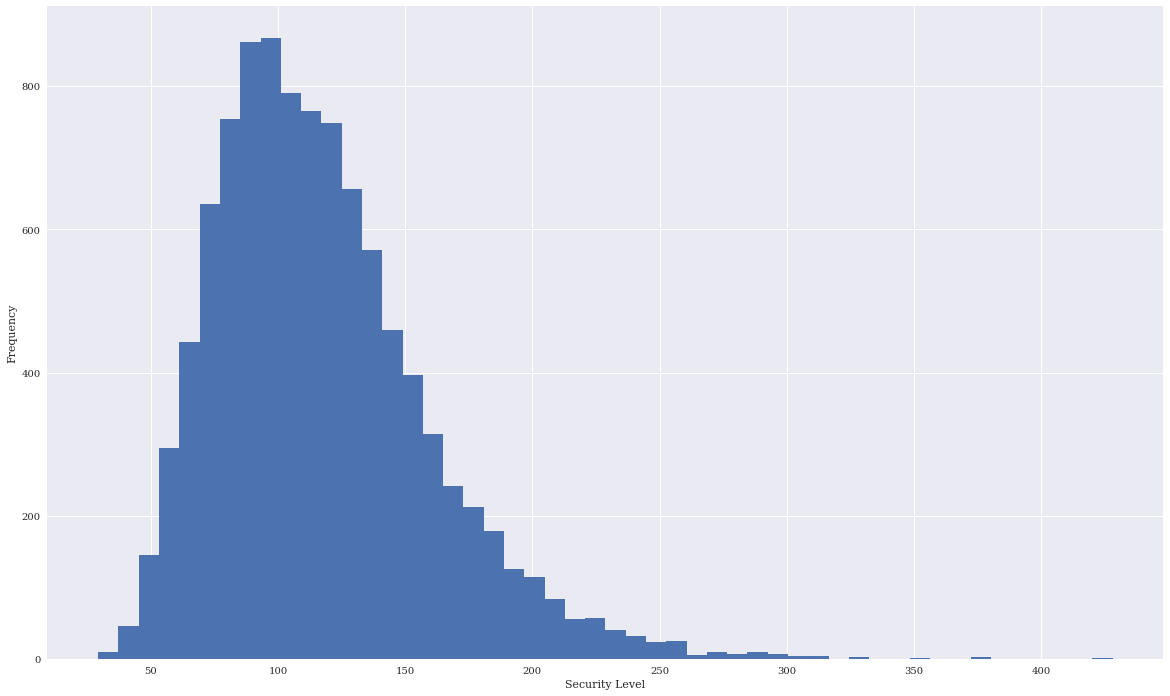

In [132]:
def analytic_black_scholes(start, vol, time, r, trials):
    return start * np.exp((r - 0.05 * vol ** 2) * time + vol * math.sqrt(time) * npr.standard_normal(trials))
monte_carlo_black_scholes = analytic_black_scholes(100, 0.25, 2, 0.05, 10000)
plt.figure(figsize=(20,12))
plt.hist(monte_carlo_black_scholes, bins=50)
plt.xlabel('Security Level')
plt.ylabel('Frequency')

# Stochastic Processes
* Generally in the form ${dX_{t} = \mu(X, t)dt + \sigma(X_{t}, t)dB_{t}}$ where B is a Brownian motion and ${\mu}$ is a function representing idiosyncratic features of the problem at hand (like the risk-free rate)
* The Black-Scholes-Merton continuous time SDE for index level is: ${dS}$